In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import json
from tqdm import tqdm

# Étape 1: Chargement des données

# Exemple : chargement des données depuis un fichier csv

# print("Chargement des données...")
# df = pd.read_csv('votre_fichier.csv')
# print("Données chargées. Shape:", df.shape)

# Exemple : chargement des données depuis un fichier JSON

# print("Chargement des données...")
# df = pd.read_json('data/amenagements-cyclables.json')
# print("Données chargées. Shape:", df.shape)

# Afficher une barre de progression pendant l'import des données

# filename = 'data/amenagements-cyclables.json'

# def count_lines(filename):
#     with open(filename, 'r') as file:
#         return sum(1 for line in file)

# total_lines = count_lines(filename)
# pbar = tqdm(total=total_lines, unit='lignes')

with open('data/amenagements-cyclables.json') as f:
    data = json.load(f)
data
# df_list = []
# with open(filename, 'r') as f:
#     for line in f:
#         df_list.append(pd.json_normalize(json.loads(line)))
#         pbar.update(1)

# df = pd.concat(df_list, ignore_index=True)

# pbar.close()

# print("Données chargées. Shape:", df.shape)

[{'osm_id': 41469916,
  'nom': "Boulevard de l'Hôpital",
  'amenagement': 'couloir bus ouvert aux vélos',
  'cote_amenagement': 'gauche',
  'sens': 'sens contraire de la voie',
  'surface': 'Asphalte',
  'arrondissement': '13',
  'bois': 'non',
  'coronapiste': 'non',
  'amenagement_temporaire': 'non',
  'infrastructure_bidirection': 'oui',
  'voie_a_sens_unique': 'non',
  'position_amenagement': 'niveau chaussée',
  'vitesse_maximale_autorisee': '30',
  'date_export': '2023-01-01T02:00:00+01:00',
  'source': 'OSMIUM',
  'st_length_shape': 22.698282152091345,
  'geo_shape': {'type': 'Feature',
   'geometry': {'coordinates': [[2.3616937004487846, 48.83984759943395],
     [2.361807199530079, 48.83988369930753],
     [2.3618433006736703, 48.83989789949563],
     [2.3618735002889526, 48.83991659918533],
     [2.3618989002565285, 48.83994149865992],
     [2.3619252002967976, 48.839972899033505]],
    'type': 'LineString'},
   'properties': {}},
  'geo_point_2d': {'lon': 2.3618178111395407, 

In [ ]:
# Étape 2: Inspection initiale
print("Aperçu des données:")
df.head()

In [ ]:
df2 = pd.json_normalize(data)
df2.head()

In [ ]:
df2.columns = df2.columns.str.replace('.', '-', regex=False)
df2.head()

In [ ]:
df2.to_csv('data/amenagements-cyclables.csv', index=False, sep=";")

In [ ]:
print("Informations sur les colonnes:")
print(df.info())
print("\nStatistiques descriptives:")
print(df.describe())

In [ ]:
# Étape 3: Traitement des valeurs manquantes
print("\nValeurs manquantes avant traitement:")
print(df.isnull().sum())

# Remplacer les valeurs manquantes numériques par la médiane
# numeric_columns = df.select_dtypes(include=[np.number]).columns
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Remplacer les valeurs manquantes catégorielles par le mode
# categorical_columns = df.select_dtypes(include=['object']).columns
# df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# print("Valeurs manquantes après traitement:")
# print(df.isnull().sum())

In [ ]:
# Étape 4: Vérification et conversion des types de données
# Exemple : conversion d'une colonne en type datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Exemple : conversion d'une colonne en type catégoriel
if 'category' in df.columns:
    df['category'] = df['category'].astype('category')

print("\nTypes de données après conversion:")
print(df.dtypes)

In [ ]:
# Étape 5: Détection et traitement des valeurs aberrantes
# Exemple pour les colonnes 'age' et 'salary'
for col in ['age', 'salary']:  # Ajustez ces colonnes selon votre dataset
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)
print("\nValeurs aberrantes traitées pour les colonnes: age, salary")

In [ ]:
# Étape 6: Création de nouvelles caractéristiques (exemple)
if 'height' in df.columns and 'weight' in df.columns:
    df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
    print("\nNouvelle caractéristique 'bmi' créée")

In [ ]:
# Étape 7: Sélection des caractéristiques
# Exemple: suppression de la colonne 'id' si elle existe
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("\nColonne 'id' supprimée")

print("\nNettoyage des données terminé!")
print("Dimensions finales du dataframe:", df.shape)

In [ ]:
# Sauvegarde du dataframe nettoyé (optionnel)
df.to_csv('donnees_nettoyees.csv', index=False)
print("\nDonnées nettoyées sauvegardées dans 'donnees_nettoyees.csv'")

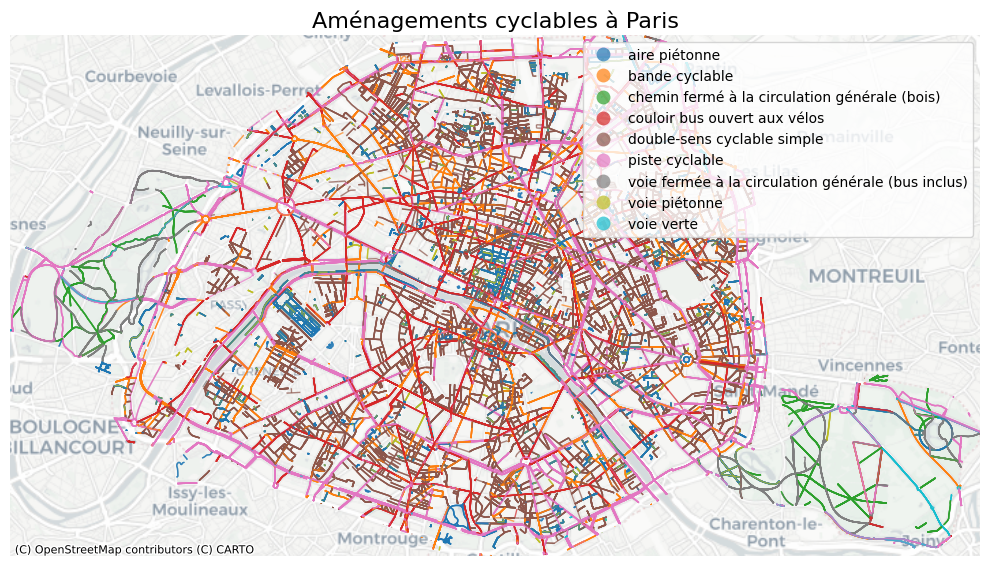

piste cyclable                                        28991
double-sens cyclable simple                           27396
aire piétonne                                         20962
couloir bus ouvert aux vélos                          14879
bande cyclable                                        12506
voie piétonne                                          6167
voie fermée à la circulation générale (bus inclus)     2043
voie verte                                             1932
chemin fermé à la circulation générale (bois)          1140
Name: amenagement, dtype: int64
Longueur totale des aménagements cyclables à Paris : 13620.67 km


In [2]:
# /// CLEAR ALL OUTPUTS BEFORE PUSHING ///

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

# Charger le fichier GeoJSON des aménagements cyclables
gdf = gpd.read_file('data/amenagements-cyclables.geojson')

# Filtrer les données pour Paris en utilisant la colonne 'arrondissement'
gdf_paris = gdf[gdf['arrondissement'].notnull()]  # Filtrer pour Paris

# Reprojeter les données en Web Mercator pour correspondre au fond de carte
gdf_paris_web_mercator = gdf_paris.to_crs(epsg=3857)

# Créer une figure et un axe
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les aménagements cyclables
gdf_paris_web_mercator.plot(ax=ax, alpha=0.7, linewidth=1, column='amenagement', legend=True)

# Ajouter le fond de carte
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Titre et mise en page
plt.title('Aménagements cyclables à Paris', fontsize=16)
plt.axis('off')

# Ajuster les limites de la carte aux données de Paris
ax.set_xlim(gdf_paris_web_mercator.total_bounds[[0, 2]])
ax.set_ylim(gdf_paris_web_mercator.total_bounds[[1, 3]])

# Afficher la carte
plt.tight_layout()
plt.show()

# Quelques statistiques sur les aménagements cyclables à Paris
print(gdf_paris['amenagement'].value_counts())

# Calculer la longueur totale des aménagements cyclables (en mètres)
gdf_paris['longueur'] = gdf_paris.to_crs(epsg=2154).geometry.length
total_length = gdf_paris['longueur'].sum()
print(f"Longueur totale des aménagements cyclables à Paris : {total_length/1000:.2f} km")

# Sauvegarder les résultats pour Paris dans un nouveau fichier GeoJSON
gdf_paris.to_file('data/resultats_paris_cyclables.geojson', driver='GeoJSON')
